CLASIFICACIÓN DE IMAGENES DE CABALLOS Y PERSONAS (2 CATEGORIAS)

Instalamos paquetes necesarios

In [1]:
!pip install setuptools==56.0.0

In [2]:
!pip install promise==2.3

In [3]:
!pip install tensorflow-datasets

In [29]:
import tensorflow as tf
import tensorflow_datasets as tfds

#Descargamos el set de caballos y personas

datos, metadatos = tfds.load('horses_or_humans', as_supervised=True, with_info=True)

In [30]:
#Imprimir los metadatos para revisarlos
metadatos

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_dir='/root/tensorflow_datasets/horses_or_humans/3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-human

In [58]:
# Clases de mi dataset
clases = metadatos.features['label'].names
print(clases)

['horses', 'humans']


Tenemos 1027 datos para train y 256 para test

image  label
0  [[[53, 55, 45], [46, 47, 40], [39, 40, 36], [3...      0
1  [[[255, 227, 204], [253, 226, 203], [251, 223,...      0
2  [[[157, 180, 202], [157, 180, 202], [157, 180,...      0
3  [[[12, 14, 14], [13, 15, 16], [15, 16, 17], [1...      0
4  [[[60, 72, 83], [59, 70, 75], [57, 64, 58], [5...      0
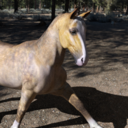
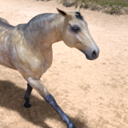
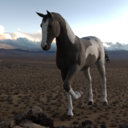
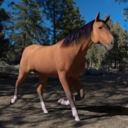
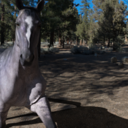

In [31]:
#Una forma de mostrar 5 ejemplos del set
tfds.as_dataframe(datos['train'].take(5), metadatos)

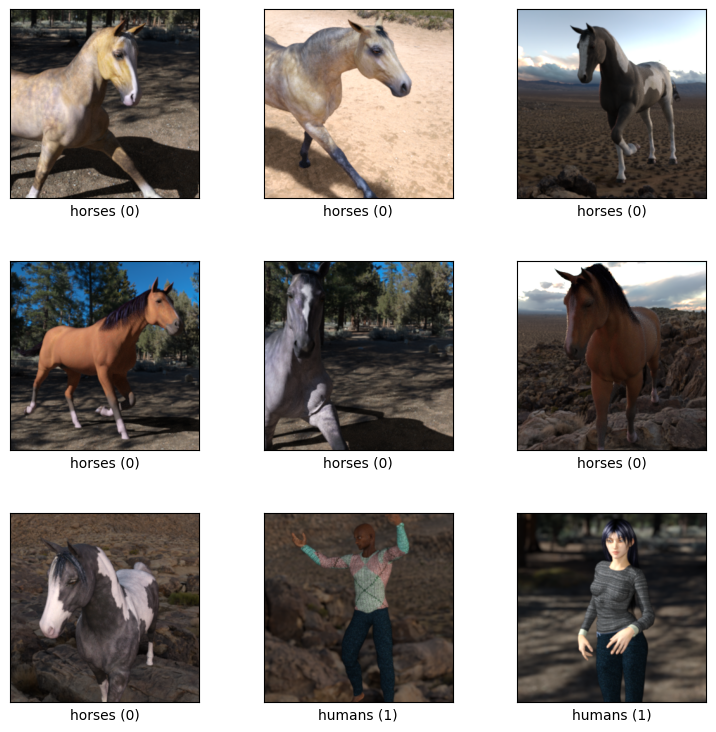

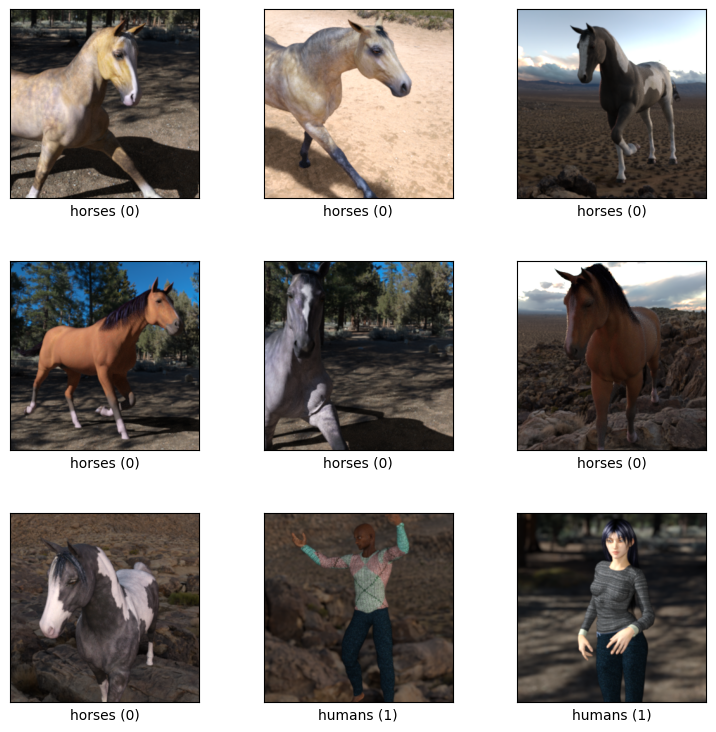

In [32]:
#Otra forma de mostrar ejemplos del set
tfds.show_examples(datos['train'], metadatos)

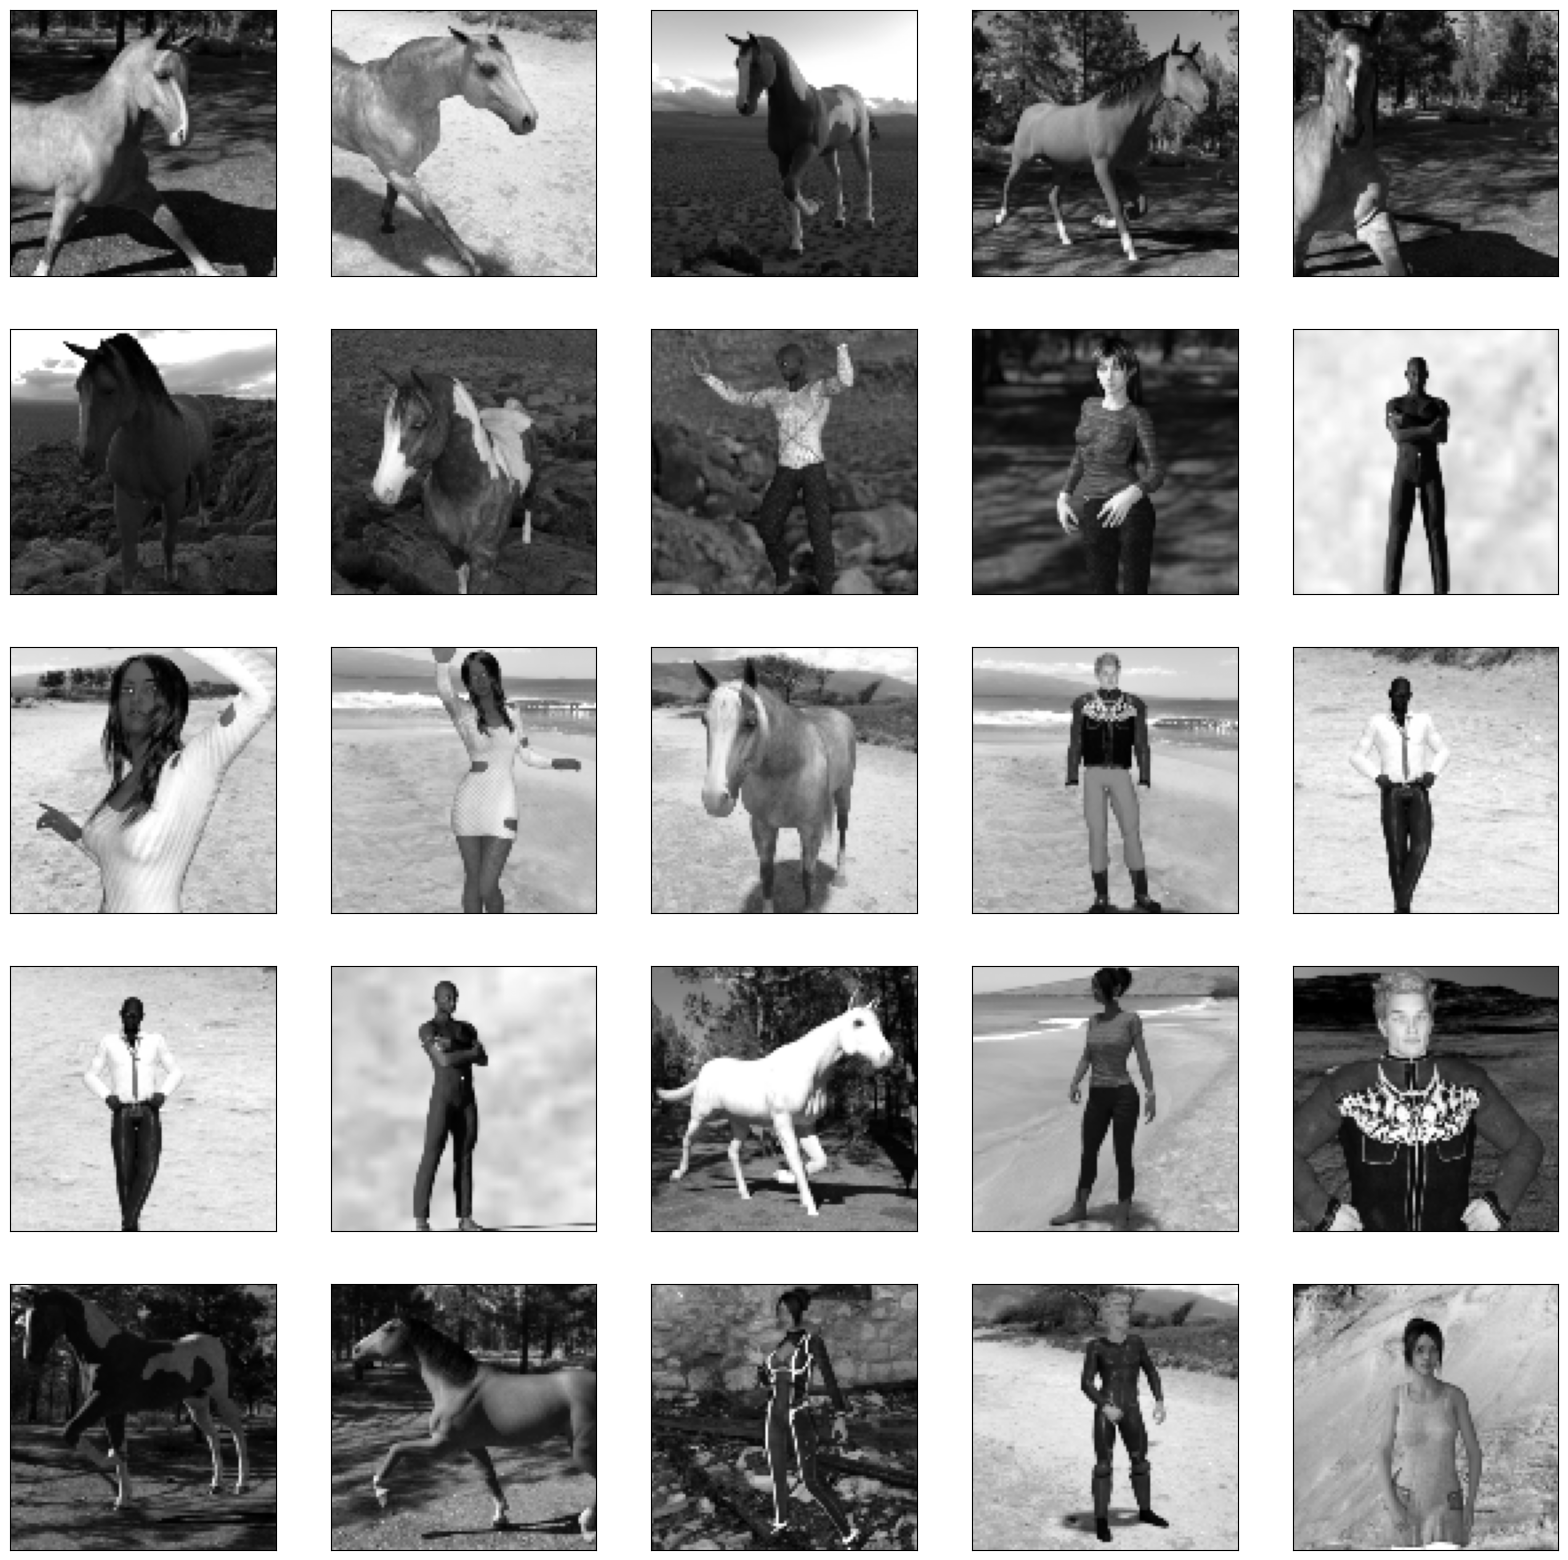

In [33]:
#Manipulamos y visualizamos el dataset
#Lo pasamos a TAMANO_IMG (100x100) y a blanco y negro (solo para visualizar)
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [34]:
#Variable que contendra todos los pares de los datos (imagen y etiqueta) ya modificados (blanco y negro, 100x100)
datos_entrenamiento = []

In [35]:
for i, (imagen, etiqueta) in enumerate(datos['train']): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamaño a 100,100,1
  datos_entrenamiento.append([imagen, etiqueta])

In [36]:
#Vemos los datos del primer indice
datos_entrenamiento[0]

[array([[[ 46],
         [ 31],
         [ 57],
         ...,
         [ 26],
         [ 24],
         [ 17]],
 
        [[ 49],
         [ 22],
         [ 40],
         ...,
         [ 22],
         [ 18],
         [ 15]],
 
        [[ 61],
         [ 41],
         [ 51],
         ...,
         [ 26],
         [ 16],
         [ 12]],
 
        ...,
 
        [[114],
         [ 73],
         [113],
         ...,
         [ 24],
         [ 33],
         [118]],
 
        [[125],
         [ 91],
         [ 84],
         ...,
         [ 30],
         [127],
         [130]],
 
        [[131],
         [126],
         [101],
         ...,
         [ 90],
         [130],
         [131]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=0>]

In [37]:
#Vemos cuantos datos tengo en la variable
len(datos_entrenamiento)

1027

In [38]:
#Preparamos las variables X (entradas) e y (etiquetas) separadas

X = [] #imagenes de entrada (pixeles)
y = [] #etiquetas (0: horses or 1: humans)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [39]:
X

[array([[[ 46],
         [ 31],
         [ 57],
         ...,
         [ 26],
         [ 24],
         [ 17]],
 
        [[ 49],
         [ 22],
         [ 40],
         ...,
         [ 22],
         [ 18],
         [ 15]],
 
        [[ 61],
         [ 41],
         [ 51],
         ...,
         [ 26],
         [ 16],
         [ 12]],
 
        ...,
 
        [[114],
         [ 73],
         [113],
         ...,
         [ 24],
         [ 33],
         [118]],
 
        [[125],
         [ 91],
         [ 84],
         ...,
         [ 30],
         [127],
         [130]],
 
        [[131],
         [126],
         [101],
         ...,
         [ 90],
         [130],
         [131]]], dtype=uint8),
 array([[[220],
         [221],
         [219],
         ...,
         [ 96],
         [ 99],
         [ 98]],
 
        [[226],
         [222],
         [222],
         ...,
         [107],
         [102],
         [102]],
 
        [[227],
         [224],
         [230],
         ...,
      

In [40]:
#Normalizamos los datos de las X (imagenes). Se pasan a numero flotante y dividen entre 255 para quedar de 0-1 en lugar de 0-255
import numpy as np

X = np.array(X).astype(float) / 255

In [41]:
X

array([[[[0.18039216],
         [0.12156863],
         [0.22352941],
         ...,
         [0.10196078],
         [0.09411765],
         [0.06666667]],

        [[0.19215686],
         [0.08627451],
         [0.15686275],
         ...,
         [0.08627451],
         [0.07058824],
         [0.05882353]],

        [[0.23921569],
         [0.16078431],
         [0.2       ],
         ...,
         [0.10196078],
         [0.0627451 ],
         [0.04705882]],

        ...,

        [[0.44705882],
         [0.28627451],
         [0.44313725],
         ...,
         [0.09411765],
         [0.12941176],
         [0.4627451 ]],

        [[0.49019608],
         [0.35686275],
         [0.32941176],
         ...,
         [0.11764706],
         [0.49803922],
         [0.50980392]],

        [[0.51372549],
         [0.49411765],
         [0.39607843],
         ...,
         [0.35294118],
         [0.50980392],
         [0.51372549]]],


       [[[0.8627451 ],
         [0.86666667],
         [0.85

In [42]:
y

[<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64

In [43]:
#Convertimos las etiquetas en un arreglo simple
y = np.array(y)

In [44]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [45]:
X.shape

(1027, 100, 100, 1)

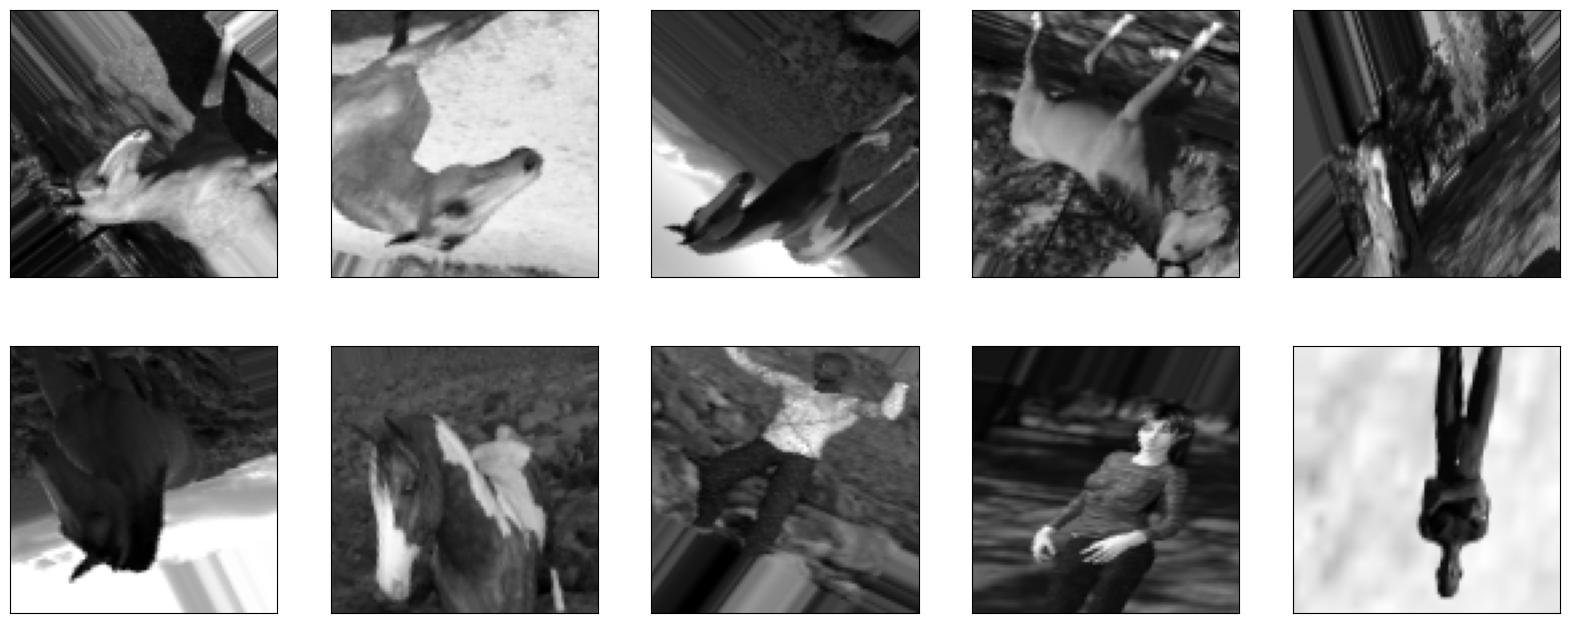

In [ ]:
#Realizamos el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [47]:
modelo = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
modelo.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [49]:
#Separar los datos de entrenamiento y los datos de pruebas en variables diferentes

len(X)*.85  #850
len(X)-850  #177

X_entrenamiento = X[:850]
X_validacion = X[850:]

y_entrenamiento = y[:850]
y_validacion = y[850:]

In [50]:
#Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [51]:
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.4905 - loss: 0.7222 - val_accuracy: 0.5141 - val_loss: 0.6816
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5629 - loss: 0.6821 - val_accuracy: 0.7458 - val_loss: 0.6478
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5526 - loss: 0.6810 - val_accuracy: 0.7740 - val_loss: 0.5173
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6224 - loss: 0.6502 - val_accuracy: 0.7627 - val_loss: 0.4744
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6420 - loss: 0.6086 - val_accuracy: 0.8418 - val_loss: 0.4003
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6827 - loss: 0.5857 - val_accuracy: 0.8192 - val_loss: 0.4154
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6276 - loss: 0.6225 - val_accuracy: 0.8418 - val_loss: 0.3371
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6961 - loss: 0.5654 - val_accuracy: 0.8588 - val_

In [52]:
#Guardamos el modelo
modelo.save("model_horse_humans.h5")
print("Modelo guardado como model_horse_humans.h5")

Modelo guardado como model_horse_humans.h5


In [53]:
model = tf.keras.models.load_model("model_horse_humans.h5")

In [ ]:
# Probamos el modelo con imagenes nuevas
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np

img_path = "caballo2.PNG"

# Cargar imagen y convertir a escala de grises
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (100, 100))
img_array = np.expand_dims(img, axis=-1)  # agrega canal (1)
img_array = np.expand_dims(img_array, axis=0)  # agrega batch (1, 100, 100, 1)

In [77]:
img_array.shape

(1, 100, 100, 1)

In [78]:
img_array

array([[[[226],
         [227],
         [227],
         ...,
         [228],
         [222],
         [230]],

        [[227],
         [227],
         [227],
         ...,
         [227],
         [226],
         [226]],

        [[227],
         [227],
         [227],
         ...,
         [227],
         [226],
         [226]],

        ...,

        [[180],
         [177],
         [157],
         ...,
         [179],
         [181],
         [172]],

        [[189],
         [173],
         [167],
         ...,
         [172],
         [165],
         [164]],

        [[187],
         [169],
         [181],
         ...,
         [146],
         [213],
         [161]]]], dtype=uint8)

In [79]:
predictions = model.predict(img_array)
print(predictions)
probabilities = tf.nn.softmax(predictions[0])
predicted_index = np.argmax(probabilities)
predicted_class = clases[predicted_index]

print(f"Clase predicha: {predicted_class} ({predicted_index})")
print(f"Confianza: {100 * np.max(probabilities):.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.]]
Clase predicha: horses (0)
Confianza: 100.00%
